In [3]:
p = "/scr2/xhu/jiaqi/wsss/datasets/RESC/valid/original_images"
label_path = "/scr2/xhu/jiaqi/wsss/datasets/RESC/valid/label_images"
layer_path = "/scr2/xhu/jiaqi/wsss/datasets/RESC/valid/layer_masks"
save_path = "/scr2/xhu/jiaqi/wsss/structure-guided/insight_test"
import os
import cv2
import numpy as np

for f in os.listdir(p):
    label_img = cv2.imread(os.path.join(label_path, f))
    if len(np.unique(label_img)) == 1:
        continue
    if 255 in label_img and len(np.unique(label_img)) == 2:
        continue
    org_img = cv2.imread(os.path.join(p, f))
    img_name = f.split(".")[0]
    layer_prob = np.load(os.path.join(layer_path, img_name + ".npy"), allow_pickle=True)
    # layer_prob[0,...] = 0.7
    layer_img = (np.argmax(layer_prob, axis=0) / 11 * 255).astype(np.uint8)
    layer_img[layer_img == 255] = 0
    # resize org_img as layer_img size
    org_img = cv2.resize(org_img[...,0], (layer_img.shape[1], layer_img.shape[0]))
    # save org_img, layer_img
    cv2.imwrite(os.path.join(save_path, img_name + "_org.png"), org_img)
    cv2.imwrite(os.path.join(save_path, img_name + "_layer.png"), layer_img)

In [122]:
uncertainty = 1-layer_prob.max(0)
uncertainty[uncertainty <= 0.5] = 0


In [123]:
s = (uncertainty * 255).astype(np.uint8)

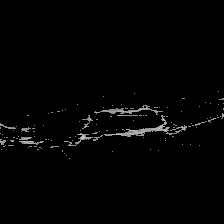

In [124]:
from PIL import Image
Image.fromarray(s)

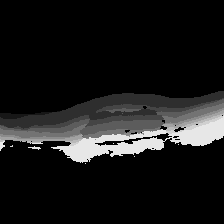

In [125]:
from PIL import Image
Image.fromarray(layer_img)

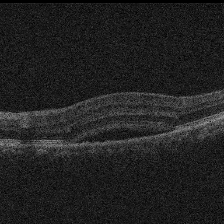

In [126]:
Image.fromarray(org_img)